# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [38]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#     to the nearest city, give the city name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = f'https://api.openweathermap.org'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #gives you an index and value for your list 
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#         every time i = 50 reset the counter 

    # Create endpoint URL with each city
    city_url = f'''{url}/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'''
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).date()

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | luganville
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | kinna
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | amarante do maranhao
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | bonthe
Processing Record 14 of Set 1 | mukalla
Processing Record 15 of Set 1 | kayangel
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | leer
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | laza
Processing Record 20 of Set 1 | hadibu
Processing Record 21 of Set 1 | misratah
Processing Record 22 of Set 1 | teguise
Processing Record

Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | kristiansund
Processing Record 40 of Set 4 | okhotsk
Processing Record 41 of Set 4 | selfoss
Processing Record 42 of Set 4 | tamandare
Processing Record 43 of Set 4 | sandnessjoen
Processing Record 44 of Set 4 | la'ie
Processing Record 45 of Set 4 | maine soroa
Processing Record 46 of Set 4 | northam
Processing Record 47 of Set 4 | pangkalanbuun
Processing Record 48 of Set 4 | mukah
City not found. Skipping...
Processing Record 49 of Set 4 | luderitz
Processing Record 0 of Set 5 | kitimat
Processing Record 1 of Set 5 | laguna de perlas
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | prince george
Processing Record 4 of Set 5 | leiyang
Processing Record 5 of Set 5 | waingapu
Processing Record 6 of Set 5 | kapa'a
Processing Record 7 of Set 5 | scone
Processing Record 8 of Set 5 | vilyuchinsk
Processing Record 9 of Set 5 | ostroleka
Processing Record 10 of Set 5 | james island
City not foun

Processing Record 24 of Set 8 | jwaneng
Processing Record 25 of Set 8 | jayapura
Processing Record 26 of Set 8 | el abiodh sidi cheikh
Processing Record 27 of Set 8 | afaahiti
Processing Record 28 of Set 8 | vernon
Processing Record 29 of Set 8 | sinabang
Processing Record 30 of Set 8 | rio claro
Processing Record 31 of Set 8 | barra de santo antonio
Processing Record 32 of Set 8 | lowell
Processing Record 33 of Set 8 | sabang
Processing Record 34 of Set 8 | constitucion
Processing Record 35 of Set 8 | cuatro cienegas de carranza
Processing Record 36 of Set 8 | puerto colombia
Processing Record 37 of Set 8 | chegdomyn
Processing Record 38 of Set 8 | guarapari
Processing Record 39 of Set 8 | olinda
Processing Record 40 of Set 8 | tyukhtet
Processing Record 41 of Set 8 | kramfors
Processing Record 42 of Set 8 | airuk
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | santa marta de ortigueira
Processing Record 45 of Set 8 | bahia blanca
Processing Record 46 of Set 8 | 

City not found. Skipping...
Processing Record 13 of Set 12 | gemena
Processing Record 14 of Set 12 | tarfaya
Processing Record 15 of Set 12 | puerto aysen
Processing Record 16 of Set 12 | leava
Processing Record 17 of Set 12 | margate
Processing Record 18 of Set 12 | bukan
Processing Record 19 of Set 12 | kachkanar
Processing Record 20 of Set 12 | ati
Processing Record 21 of Set 12 | lubang
Processing Record 22 of Set 12 | sakakah
Processing Record 23 of Set 12 | amursk
Processing Record 24 of Set 12 | tremp
Processing Record 25 of Set 12 | point pedro
Processing Record 26 of Set 12 | kirensk
Processing Record 27 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 28 of Set 12 | coronel suarez
Processing Record 29 of Set 12 | mokpo
Processing Record 30 of Set 12 | vila velha
Processing Record 31 of Set 12 | timbuktu
Processing Record 32 of Set 12 | cintalapa de figueroa
Processing Record 33 of Set 12 | butte
Processing Record 34 of Set 12 | la palma
Processing Record 35

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-8.91,98,39,5.88,RU,2023-11-25
1,port elizabeth,-33.9180,25.5701,68.29,85,100,5.75,ZA,2023-11-25
2,albany,42.6001,-73.9662,39.56,52,28,3.00,US,2023-11-25
3,kingston,17.9970,-76.7936,84.20,60,80,5.10,JM,2023-11-25
4,constantia,44.1833,28.6500,39.88,91,100,28.95,RO,2023-11-25


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("Output_Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-8.91,98,39,5.88,RU,2023-11-25
1,port elizabeth,-33.9180,25.5701,68.29,85,100,5.75,ZA,2023-11-25
2,albany,42.6001,-73.9662,39.56,52,28,3.00,US,2023-11-25
3,kingston,17.9970,-76.7936,84.20,60,80,5.10,JM,2023-11-25
4,constantia,44.1833,28.6500,39.88,91,100,28.95,RO,2023-11-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

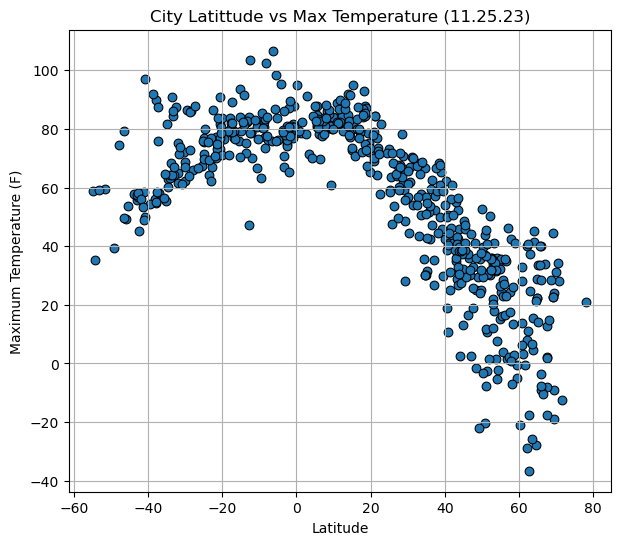

In [66]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, 
                  figsize=(7,6), xlabel = 'Latitude', ylabel ='Maximum Temperature (F)',
              title='City Latittude vs Max Temperature (11.25.23)',
                  s=40, edgecolors='black', linewidths=.75)
# Save the figure
plt.savefig("Output_Data/Figure_1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

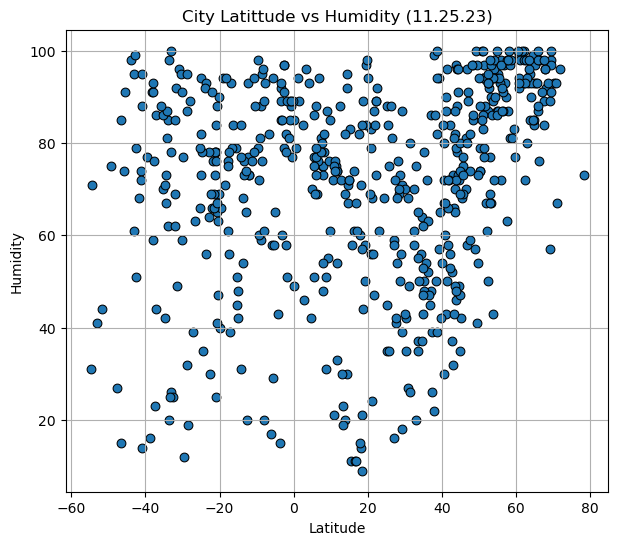

In [70]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, 
                  figsize=(7,6), xlabel = 'Latitude', ylabel ='Humidity',
              title='City Latittude vs Humidity (11.25.23)',
                  s=40, edgecolors='black', linewidths=.75)
# Save the figure
plt.savefig("Output_Data/Figure_2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

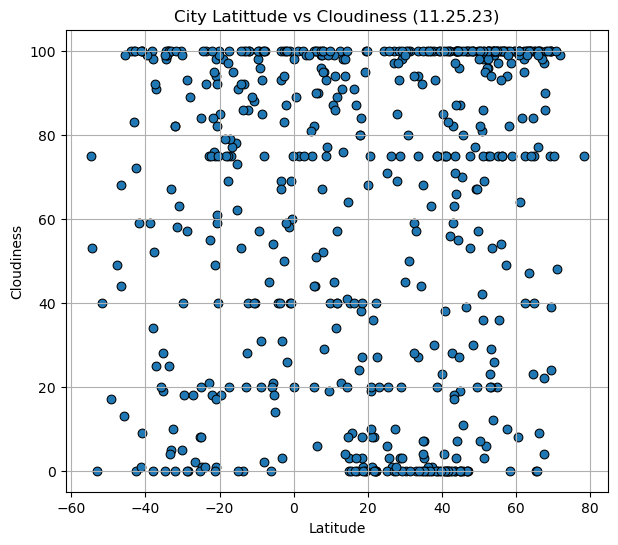

In [72]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Cloudiness', grid=True, 
                  figsize=(7,6), xlabel = 'Latitude', ylabel ='Cloudiness',
              title='City Latittude vs Cloudiness (11.25.23)',
                  s=40, edgecolors='black', linewidths=.75)
# Save the figure
plt.savefig("Output_Data/Figure_3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

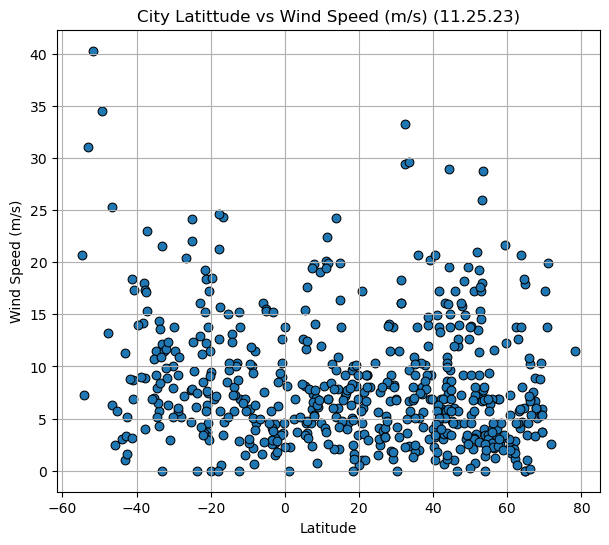

In [74]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x='Lat', y='Wind Speed', grid=True, 
                  figsize=(7,6), xlabel = 'Latitude', ylabel ='Wind Speed (m/s)',
              title='City Latittude vs Wind Speed (m/s) (11.25.23)',
                  s=40, edgecolors='black', linewidths=.75)
# Save the figure
plt.savefig("Output_Data/Figure_4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots

# (slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,-8.91,98,39,5.88,RU,2023-11-25
2,albany,42.6001,-73.9662,39.56,52,28,3.00,US,2023-11-25
3,kingston,17.9970,-76.7936,84.20,60,80,5.10,JM,2023-11-25
4,constantia,44.1833,28.6500,39.88,91,100,28.95,RO,2023-11-25
8,kinna,57.5073,12.6946,24.44,63,10,6.89,SE,2023-11-25


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,68.29,85,100,5.75,ZA,2023-11-25
5,codrington,-38.2667,141.9667,55.94,91,100,14.16,AU,2023-11-25
6,luganville,-15.5333,167.1667,76.03,79,78,8.50,VU,2023-11-25
7,adamstown,-25.0660,-130.1015,71.51,82,84,22.01,PN,2023-11-25
10,amarante do maranhao,-5.5667,-46.7422,98.28,29,21,7.58,BR,2023-11-25


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7497114004179609


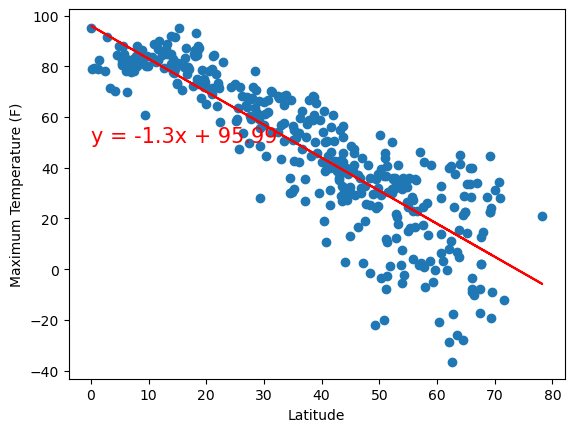

In [89]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values, y_values)
regress_values_1 = x_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue_1**2}")
plt.show()

The r-squared is: 0.34964489578398333


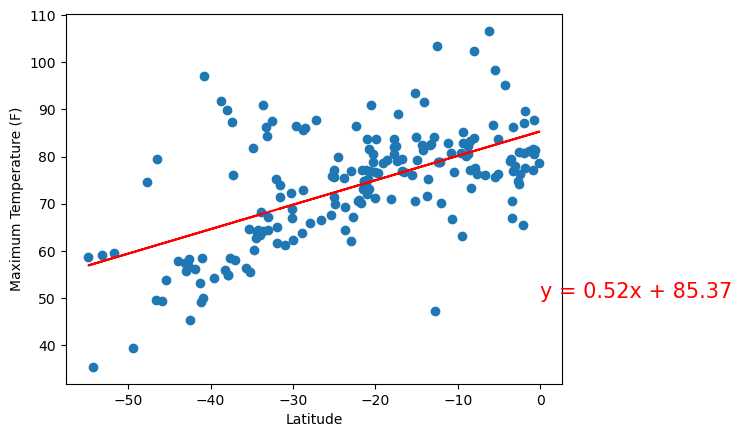

In [90]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_values, y_values)
regress_values_2 = x_values * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x + " + str(round(intercept_2,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_2,"r-")
plt.annotate(line_eq_2,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
print(f"The r-squared is: {rvalue_2**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17154838908522782


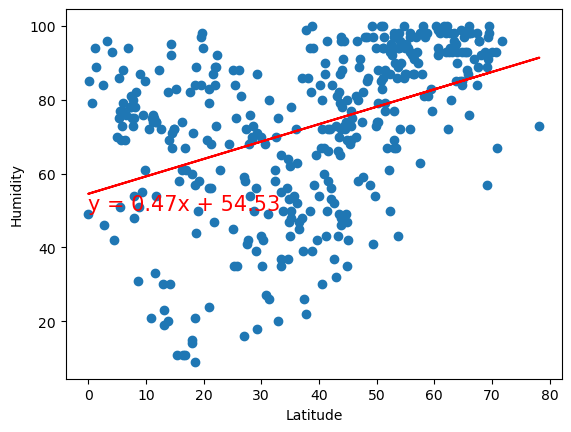

In [91]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values, y_values)
regress_values_1 = x_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue_1**2}")
plt.show()

The r-squared is: 0.021557754962715014


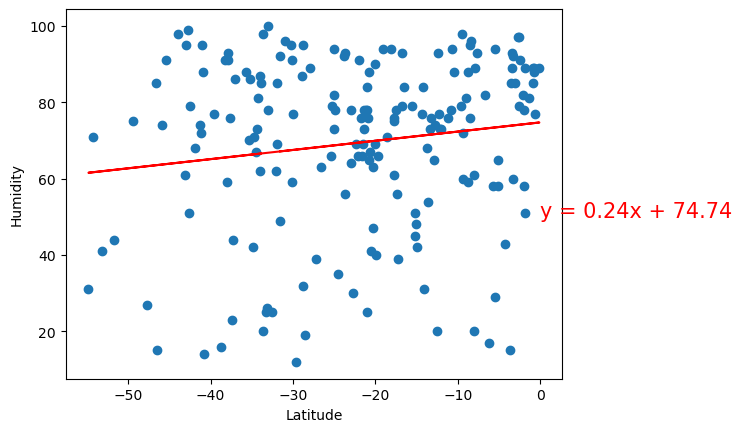

In [92]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_values, y_values)
regress_values_2 = x_values * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x + " + str(round(intercept_2,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_2,"r-")
plt.annotate(line_eq_2,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue_2**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.025038079474433084


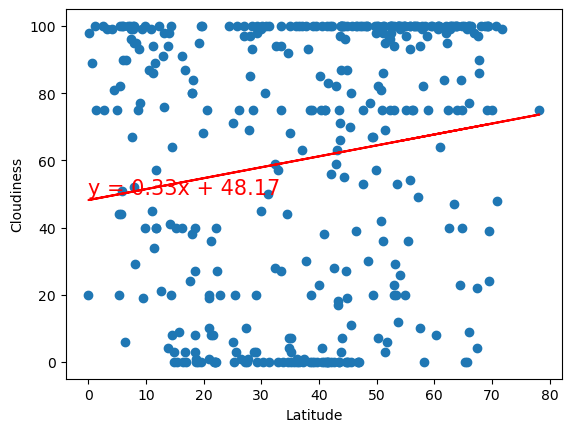

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values, y_values)
regress_values_1 = x_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue_1**2}")
plt.show()

The r-squared is: 0.006157825457382561


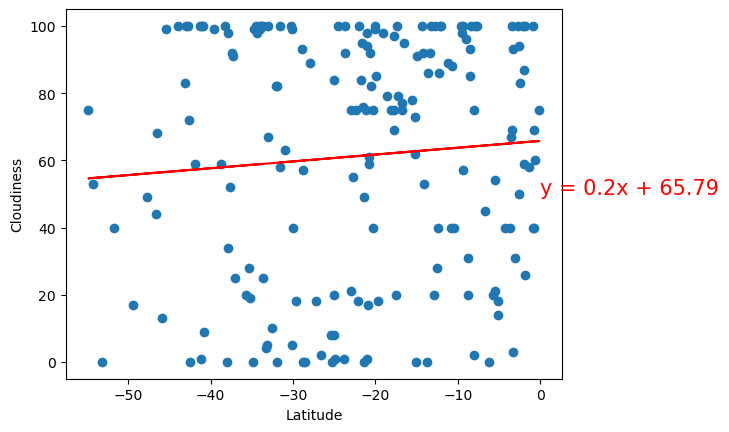

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_values, y_values)
regress_values_2 = x_values * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x + " + str(round(intercept_2,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_2,"r-")
plt.annotate(line_eq_2,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue_2**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0015265919778010178


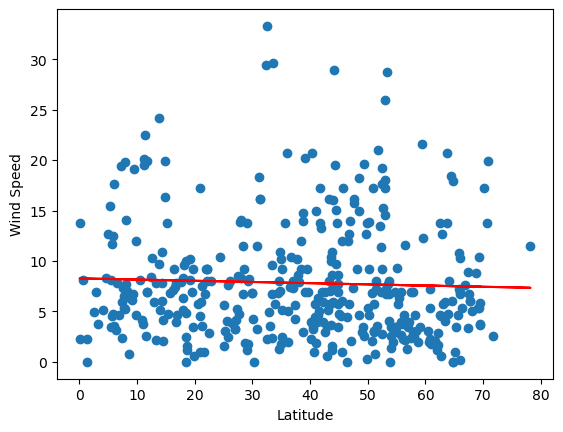

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope_1, intercept_1, rvalue_1, pvalue_1, stderr_1) = linregress(x_values, y_values)
regress_values_1 = x_values * slope_1 + intercept_1
line_eq_1 = "y = " + str(round(slope_1,2)) + "x + " + str(round(intercept_1,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_1,"r-")
plt.annotate(line_eq_1,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue_1**2}")
plt.show()

The r-squared is: 0.11331108249368252


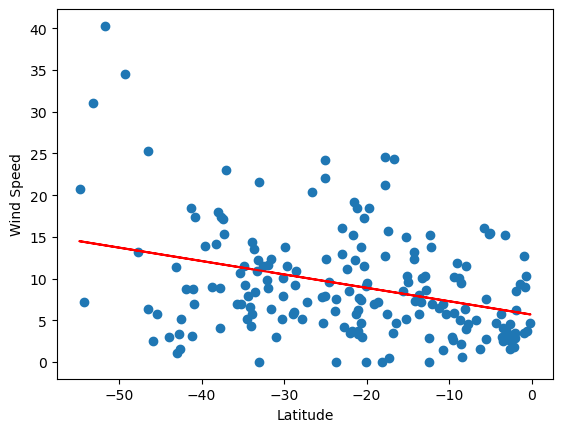

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope_2, intercept_2, rvalue_2, pvalue_2, stderr_2) = linregress(x_values, y_values)
regress_values_2 = x_values * slope_2 + intercept_2
line_eq_2 = "y = " + str(round(slope_2,2)) + "x + " + str(round(intercept_2,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_2,"r-")
plt.annotate(line_eq_2,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue_2**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE